#### **MENGIMPOR LIBRARY YANG DIBUTUHKAN**

In [36]:
import pandas as pd
import re
import string
import seaborn as sb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing


#### **LOAD DAN PREPROCESSING DATA**

In [37]:
df = pd.read_csv('dataset/news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [38]:
df = df.drop(["Unnamed: 0", "title"], axis=1)
df.head(5)

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL


In [39]:
# encoding the labels
le = preprocessing.LabelEncoder()
le.fit(df['label'])
df['label'] = le.transform(df['label'])

In [40]:
df.head()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,U.S. Secretary of State John F. Kerry said Mon...,1
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,It's primary day in New York and front-runners...,1


In [41]:
df.isna().sum()

text     0
label    0
dtype: int64

/tmp/ipykernel_44846/2030557657.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  return sb.countplot(x='label', data=dataFile, palette='hls')


<Axes: xlabel='label', ylabel='count'>

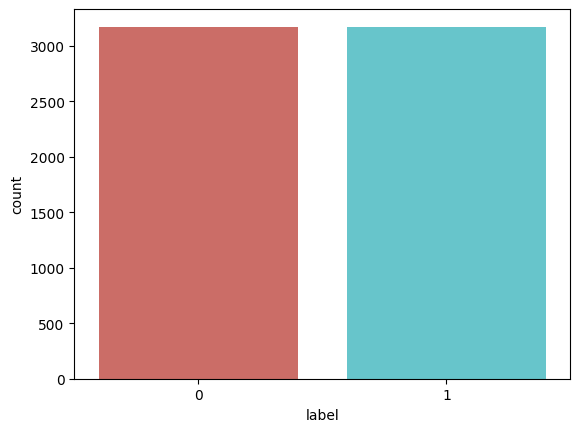

In [42]:
def create_distribution(dataFile):
    return sb.countplot(x='label', data=dataFile, palette='hls')

# by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(df)

In [43]:
def data_qualityCheck():
    print("Checking data qualitites...")
    df.isnull().sum()
    df.info()  
    print("check finished.")
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    6335 non-null   object
 1   label   6335 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 99.1+ KB
check finished.


#### **FUNGSI UNTUK TEXT PREPROCESSING**

In [44]:
def wordopt(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text) 
    text = re.sub(r"\W", " ", text)      
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  
    text = re.sub(r'<.*?>+', '', text)  
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  
    text = re.sub(r'\w*\d\w*', '', text)  
    return text

In [45]:
df['text'] = df['text'].apply(wordopt)

In [46]:
df.head()

,text,label
0,daniel greenfield a shillman journalism fello...,0
1,google pinterest digg linkedin reddit stumbleu...,0
2,u s secretary of state john f kerry said mon...,1
3,kaydee king kaydeeking november the le...,0
4,it s primary day in new york and front runners...,1


#### **SPLITTING DATA**

In [47]:
x = df['text']
y = df['label']

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)

#### **VECTORIZATION**

In [49]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

### **PREDIKSI DAN EVALUASI MODEL**

### **Logistic Regression**

In [50]:
LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [51]:
LR.fit(xv_train, y_train)
pred_lr = LR.predict(xv_test)
LR.score(xv_test, y_test)
pred_lr = LR.predict(xv_test)

In [52]:
LR.score(xv_test, y_test)

0.9078282828282829

In [53]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       806
           1       0.93      0.88      0.90       778

    accuracy                           0.91      1584
   macro avg       0.91      0.91      0.91      1584
weighted avg       0.91      0.91      0.91      1584



### **Decision Tree**

In [54]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [55]:
pred_dt = DT.predict(xv_test)

In [56]:
DT.score(xv_test, y_test)

0.8055555555555556

In [57]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       806
           1       0.93      0.88      0.90       778

    accuracy                           0.91      1584
   macro avg       0.91      0.91      0.91      1584
weighted avg       0.91      0.91      0.91      1584



### **Gradien Boost**

In [58]:
GB = GradientBoostingClassifier(random_state = 0)
GB.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [59]:
pred_gb = GB.predict(xv_test)

In [60]:
GB.score(xv_test, y_test)

0.8888888888888888

In [61]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       806
           1       0.90      0.87      0.88       778

    accuracy                           0.89      1584
   macro avg       0.89      0.89      0.89      1584
weighted avg       0.89      0.89      0.89      1584



### **Random Classifier**

In [62]:
RF = RandomForestClassifier(random_state = 0)
RF.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [63]:
pred_rf = RF.predict(xv_test)

In [64]:
RF.score(xv_test, y_test)

0.8882575757575758

In [65]:
print (classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       806
           1       0.89      0.88      0.89       778

    accuracy                           0.89      1584
   macro avg       0.89      0.89      0.89      1584
weighted avg       0.89      0.89      0.89      1584



### **TESTING MODEL**

In [66]:
def output_lable(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GB = GB.predict(new_xv_test)
    pred_RF = RF.predict(new_xv_test)
    
    return print("\n\nLR Predicition: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction:{}".format(output_lable(pred_LR[0]),
                                                                                                             output_lable(pred_DT[0]),
                                                                                                             output_lable(pred_GB[0]),
                                                                                                             output_lable(pred_RF[0])))

In [67]:
news = str(input()) 
manual_testing(news)



LR Predicition: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction:Fake News
